In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\balag\OneDrive\Desktop\Data Mites\Projects\Portugese Bank\PRCP-1000-ProtugeseBank\Data\bank-additional\bank-additional-full.csv")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
data.shape

(41188, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Exploratory Data Analysis

In [8]:
data.corr(numeric_only = True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<Axes: >

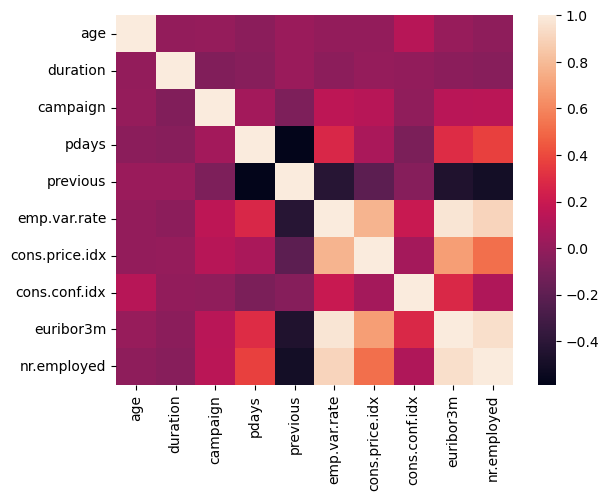

In [9]:
sns.heatmap(data.corr(numeric_only = True))

In [10]:
data = data.drop('euribor3m',axis=1)

In [11]:
CP = data.select_dtypes(include="object")

CP.shape

(41188, 11)

In [12]:
HM = data.select_dtypes(include = ['int64','float64'])

HM.shape

(41188, 9)

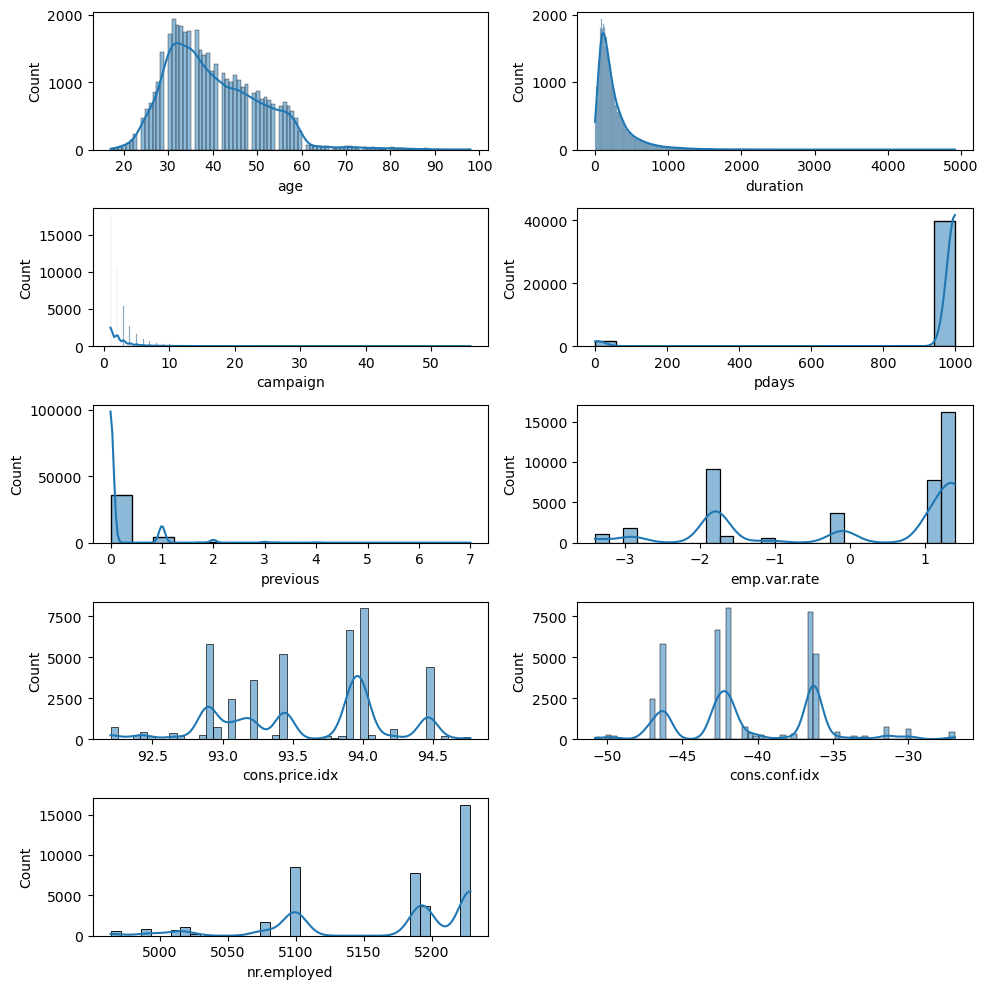

In [13]:
plot_number = 1
plt.figure(figsize=(10,10))
for column in HM:
    if plot_number <= 10:
        ax = plt.subplot(5,2,plot_number)
        sns.histplot(data[column],kde = True)
        plt.xlabel(column)
        plt.ylabel('Count')
    plot_number+=1
plt.tight_layout()
plt.show()
    

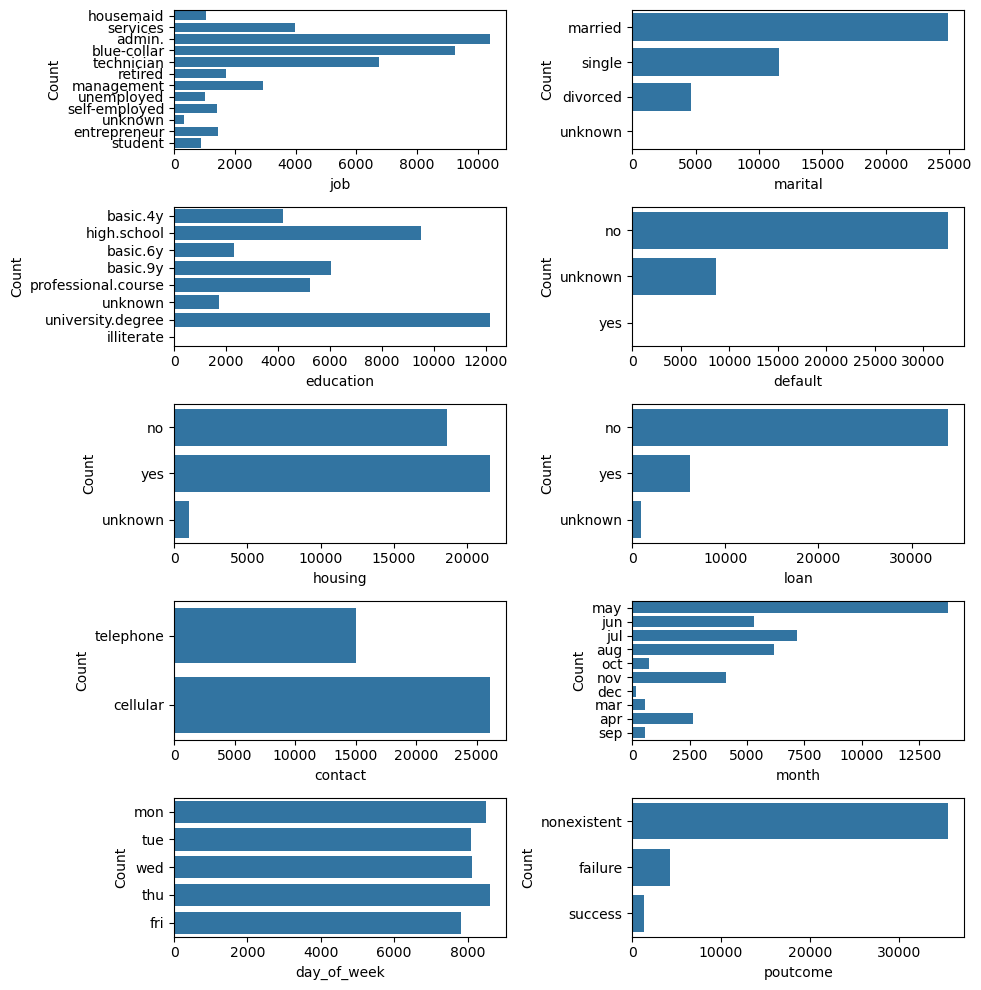

In [14]:
plot_number = 1
plt.figure(figsize=(10,10))
for column in CP:
    if plot_number <= 10:
        ax = plt.subplot(5,2,plot_number)
        sns.countplot(data[column])
        plt.xlabel(column)
        plt.ylabel('Count')
    plot_number+=1
plt.tight_layout()
plt.show()
    

In [15]:
for column in CP:
    for i in range(0,41188):
        if data[column][i] == "unknown":
            mode = data[column].mode()[0]
            data[column][i] = mode
    

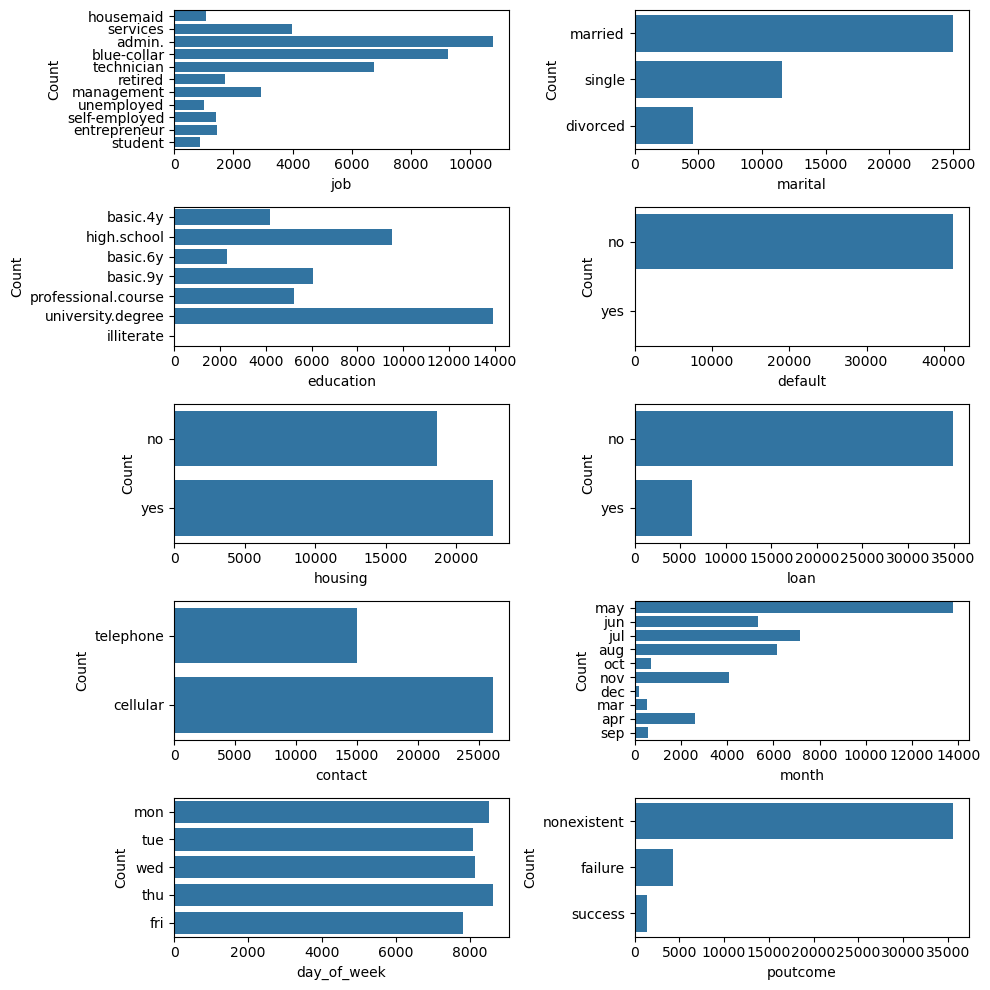

In [16]:
plot_number = 1
plt.figure(figsize=(10,10))
for column in CP:
    if plot_number <= 10:
        ax = plt.subplot(5,2,plot_number)
        sns.countplot(data[column])
        plt.xlabel(column)
        plt.ylabel('Count')
    plot_number+=1
plt.tight_layout()
plt.show()

In [17]:
data.default.value_counts()

default
no     41185
yes        3
Name: count, dtype: int64

In [18]:
# Chercking the Categorical Columns corretion with the Output Variable
dependency = []
No_dependency = []
for column in CP:
    contingency_table = pd.crosstab(data[column], data['y'])
    chi2_statistic, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)
    alpha = 0.05
    if p_value < alpha:
        dependency.append(column)
    else:
        No_dependency.append(column)
    

In [19]:
print(dependency)

['job', 'marital', 'education', 'housing', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [20]:
print(No_dependency)

['default', 'loan']


In [21]:
data=data.drop(['default','loan'],axis=1)

In [22]:
le = LabelEncoder()
data['housing'] = le.fit_transform(data['housing'])
data['y'] = le.fit_transform(data['y'])

In [23]:
to_encode = ['job','marital','education','contact','month','day_of_week','poutcome']
data_encoded = pd.get_dummies(data, columns=to_encode, dtype=int)

In [24]:
data_encoded.columns

Index(['age', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtyp

In [25]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'y'],
      dtype='object')

In [26]:
new_order = ['age','job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed','marital_divorced', 'marital_married', 'marital_single','education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree','housing','contact_cellular', 'contact_telephone','month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep','day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed','duration', 'campaign', 'pdays', 'previous','poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'y']
set(new_order) - set(data.columns)
available_cols = [c for c in new_order if c in data.columns]
processed_data = data[available_cols]

for col in new_order:
    if col not in data.columns:
        data[col] = 0

processed_data = data[new_order]


In [27]:
print(processed_data.shape)

(41188, 52)


In [28]:
X = processed_data.drop('y',axis=1)
y = processed_data['y']

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

# Seperating The independent And Dependent Columns

In [30]:
X_scaled.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,campaign,pdays,previous,poutcome_failure,poutcome_nonexistent,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
0,1.533034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.565922,0.195414,-0.349494,0.0,0.0,0.0,0.648092,0.722722,0.886447,0.33168
1,1.628993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.565922,0.195414,-0.349494,0.0,0.0,0.0,0.648092,0.722722,0.886447,0.33168
2,-0.290186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.565922,0.195414,-0.349494,0.0,0.0,0.0,0.648092,0.722722,0.886447,0.33168
3,-0.002309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.565922,0.195414,-0.349494,0.0,0.0,0.0,0.648092,0.722722,0.886447,0.33168
4,1.533034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.565922,0.195414,-0.349494,0.0,0.0,0.0,0.648092,0.722722,0.886447,0.33168


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state = 42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28831, 51)
(12357, 51)
(28831,)
(12357,)


# Model Building

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
predict = lr.predict(X_test)

In [37]:
accuracy_score(predict,y_test)

0.910091446143886

In [38]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.67      0.39      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [39]:
print(confusion_matrix(y_test,predict))

[[10700   268]
 [  843   546]]


In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
dtreepred = dtree.predict(X_test)
confusion_matrix(y_test, dtreepred)

array([[10229,   739],
       [  688,   701]], dtype=int64)

In [44]:
accuracy_score(dtreepred,y_test)

0.8845188961722101

In [45]:
print(classification_report(y_test, dtreepred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10968
           1       0.49      0.50      0.50      1389

    accuracy                           0.88     12357
   macro avg       0.71      0.72      0.72     12357
weighted avg       0.89      0.88      0.89     12357



In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [47]:
rfcpred = rfc.predict(X_test)

In [48]:
confusion_matrix(y_test, rfcpred)

array([[10503,   465],
       [  695,   694]], dtype=int64)

In [50]:
accuracy_score(rfcpred,y_test)

0.9061260823824553

In [51]:
print(classification_report(y_test, rfcpred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.60      0.50      0.54      1389

    accuracy                           0.91     12357
   macro avg       0.77      0.73      0.75     12357
weighted avg       0.90      0.91      0.90     12357



In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [55]:
xgbprd = xgb.predict(X_test)

In [56]:
confusion_matrix(y_test, xgbprd)

array([[10539,   429],
       [  666,   723]], dtype=int64)

In [57]:
accuracy_score(xgbprd,y_test)

0.9113862588006798

In [58]:
print(classification_report(y_test, xgbprd))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.63      0.52      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.78      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)

GradientBoostingClassifier()

In [60]:
gbkpred = gbk.predict(X_test)

In [62]:
confusion_matrix(y_test, gbkpred)

array([[10624,   344],
       [  688,   701]], dtype=int64)

In [63]:
accuracy_score(gbkpred,y_test)

0.9164845836368051

In [61]:
print(classification_report(y_test, gbkpred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.67      0.50      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.92      0.91     12357

